# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial"
city_url = url + "&q=" + cities[0] 

city_weather = requests.get(city_url).json()


city_weather

{'coord': {'lon': -172.5159, 'lat': -8.5421},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 84.18,
  'feels_like': 91.89,
  'temp_min': 84.18,
  'temp_max': 84.18,
  'pressure': 1010,
  'humidity': 73,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 12.21, 'deg': 74, 'gust': 12.8},
 'clouds': {'all': 100},
 'dt': 1701251786,
 'sys': {'country': 'TK', 'sunrise': 1701277284, 'sunset': 1701322547},
 'timezone': 46800,
 'id': 7522183,
 'name': 'Atafu Village',
 'cod': 200}

In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial"
#make sure to put api key {} so it knows to bring it in and the f at the beginning

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | yoloten
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | homer
Processing Record 10 of Set 1 | lubang
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | hoi an
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | karbala
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | bomlitz
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | rhinelander
Processing Record 21 of Set 1 | severo-yeniseyskiy
Processing Record 

Processing Record 37 of Set 4 | karaton
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | zangguy
City not found. Skipping...
Processing Record 41 of Set 4 | velingara
Processing Record 42 of Set 4 | baikonur
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | aktau
Processing Record 45 of Set 4 | arys
Processing Record 46 of Set 4 | kailua-kona
Processing Record 47 of Set 4 | buguruslan
Processing Record 48 of Set 4 | whitehorse
Processing Record 49 of Set 4 | ambovombe
Processing Record 0 of Set 5 | anajatuba
Processing Record 1 of Set 5 | carbonear
Processing Record 2 of Set 5 | skutskar
City not found. Skipping...
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | urzhar
Processing Record 5 of Set 5 | kayangel
Processing Record 6 of Set 5 | villeneuve-sur-lot
Processing Record 7 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 5 | ketchik

Processing Record 30 of Set 8 | xai-xai
Processing Record 31 of Set 8 | pamandzi
Processing Record 32 of Set 8 | mugia
Processing Record 33 of Set 8 | buncrana
Processing Record 34 of Set 8 | bryne
Processing Record 35 of Set 8 | tucurui
Processing Record 36 of Set 8 | center
Processing Record 37 of Set 8 | howrah
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | weno
Processing Record 40 of Set 8 | mata-utu
Processing Record 41 of Set 8 | quebo
Processing Record 42 of Set 8 | essaouira
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | francisco sa
Processing Record 45 of Set 8 | preobrazheniye
Processing Record 46 of Set 8 | ghat
Processing Record 47 of Set 8 | guasdualito
Processing Record 48 of Set 8 | nemuro
Processing Record 49 of Set 8 | zhangye
Processing Record 0 of Set 9 | vila do maio
Processing Record 1 of Set 9 | opuwo
Processing Record 2 of Set 9 | tucuma
Processing Record 3 of Set 9 | kalemie
Processing Record 4 of Set 9 | galliano
P

Processing Record 18 of Set 12 | taro
Processing Record 19 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 20 of Set 12 | chernyshevskiy
Processing Record 21 of Set 12 | castilho
Processing Record 22 of Set 12 | beira
Processing Record 23 of Set 12 | khovd
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | tongchuan
Processing Record 26 of Set 12 | meulaboh
Processing Record 27 of Set 12 | sisimiut
Processing Record 28 of Set 12 | lubango
Processing Record 29 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 30 of Set 12 | rybinsk
Processing Record 31 of Set 12 | bontang
Processing Record 32 of Set 12 | narasimharajapura
Processing Record 33 of Set 12 | norilsk
Processing Record 34 of Set 12 | ahau
City not found. Skipping...
Processing Record 35 of Set 12 | kafarati
Processing Record 36 of Set 12 | kil'mez'
City not found. Skipping...
Processing Record 37 of Set 12 | fontenay-le-comte
Processing Record 38 of Set 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,84.18,73,100,12.21,TK,1701253388
1,yoloten,37.2989,62.3597,57.97,39,72,9.22,TM,1701253392
2,bethel,41.3712,-73.4140,28.49,69,0,6.91,US,1701253392
3,thompson,55.7435,-97.8558,8.76,85,100,3.44,CA,1701253393
4,port mathurin,-19.6833,63.4167,78.10,66,0,8.88,MU,1701253393


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,84.18,73,100,12.21,TK,1701253388
1,yoloten,37.2989,62.3597,57.97,39,72,9.22,TM,1701253392
2,bethel,41.3712,-73.4140,28.49,69,0,6.91,US,1701253392
3,thompson,55.7435,-97.8558,8.76,85,100,3.44,CA,1701253393
4,port mathurin,-19.6833,63.4167,78.10,66,0,8.88,MU,1701253393


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

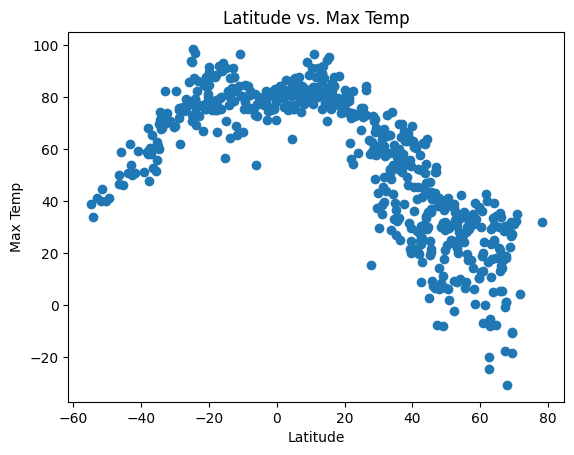

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

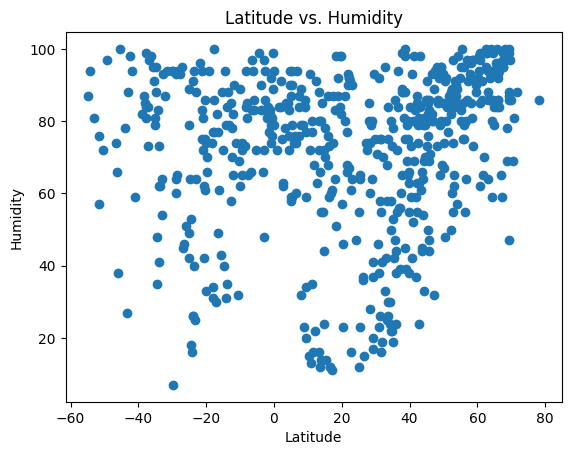

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

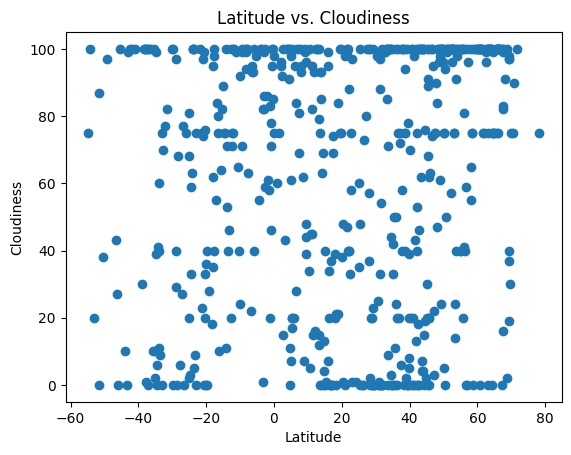

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

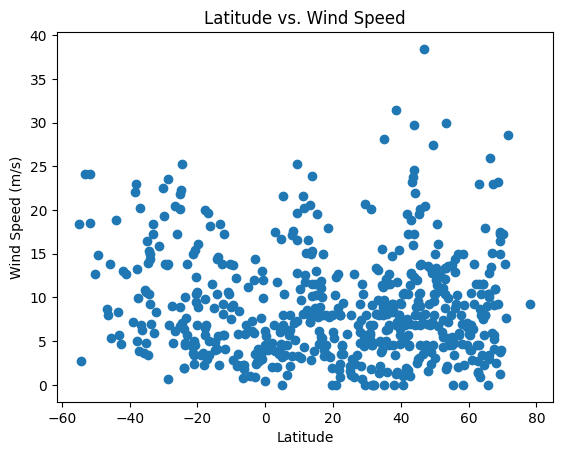

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yoloten,37.2989,62.3597,57.97,39,72,9.22,TM,1701253392
2,bethel,41.3712,-73.4140,28.49,69,0,6.91,US,1701253392
3,thompson,55.7435,-97.8558,8.76,85,100,3.44,CA,1701253393
6,iqaluit,63.7506,-68.5145,33.53,86,100,10.36,CA,1701253402
7,vila franca do campo,37.7167,-25.4333,63.01,99,100,8.72,PT,1701253408


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,84.18,73,100,12.21,TK,1701253388
4,port mathurin,-19.6833,63.4167,78.10,66,0,8.88,MU,1701253393
5,mount isa,-20.7333,139.5000,87.57,42,99,4.61,AU,1701253399
10,port-aux-francais,-49.3500,70.2167,41.22,97,97,14.90,TF,1701253422
14,grytviken,-54.2811,-36.5092,34.03,94,100,2.71,GS,1701253428


###  Temperature vs. Latitude Linear Regression Plot

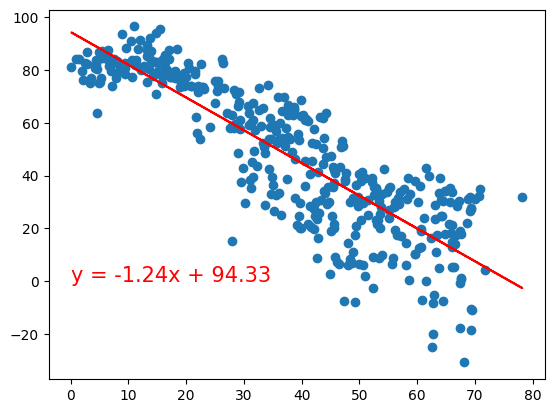

In [44]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp (C)', (0, 0))


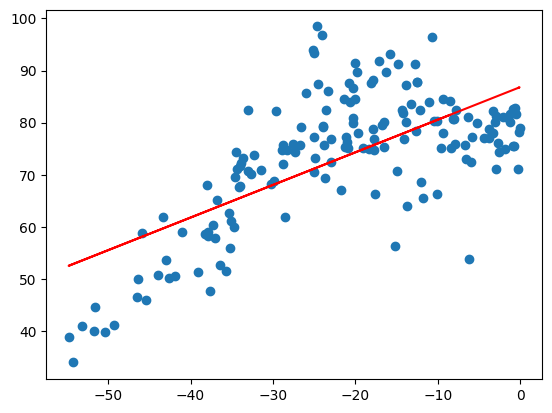

In [45]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp (C)', (-55, 25))


**Discussion about the linear relationship:** There is a strong negative correlation in the northern hemisphere, meanwhile in the southern hemisphere there is a positive correlation in the southern hemosphere.

### Humidity vs. Latitude Linear Regression Plot

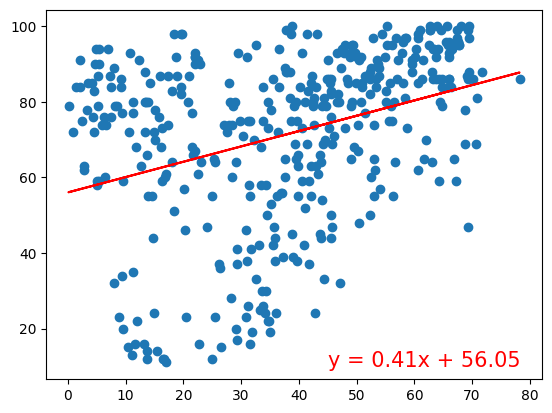

In [46]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity (%)', (45, 10))


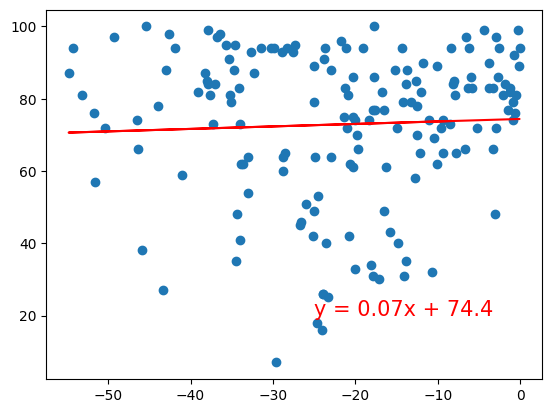

In [47]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity (%)', (-25, 20))


**Discussion about the linear relationship:** There is little correlation between humidity and latitude in the nothern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

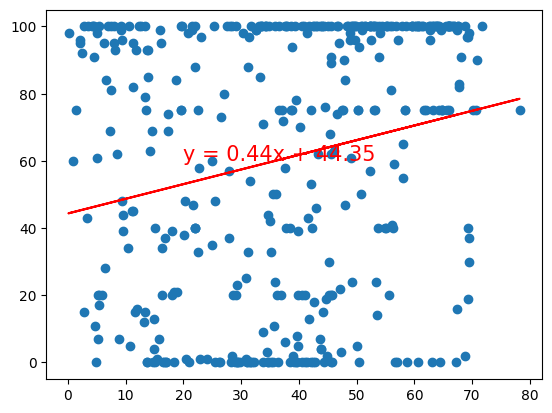

In [48]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness (%)', (20, 60))


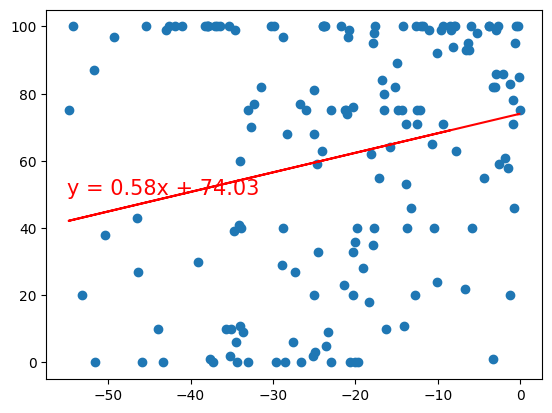

In [49]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness (%)', (-55, 50))


**Discussion about the linear relationship:** There is almost no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

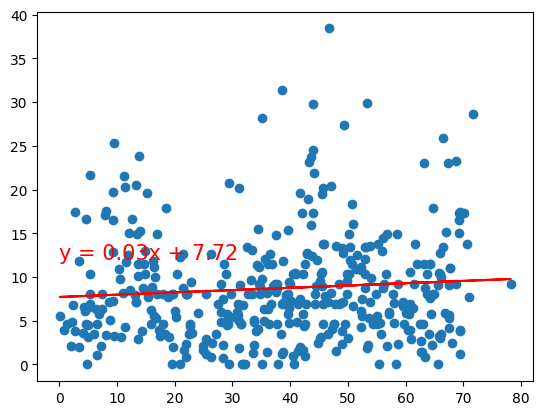

In [50]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed (m/s)', (0, 12))


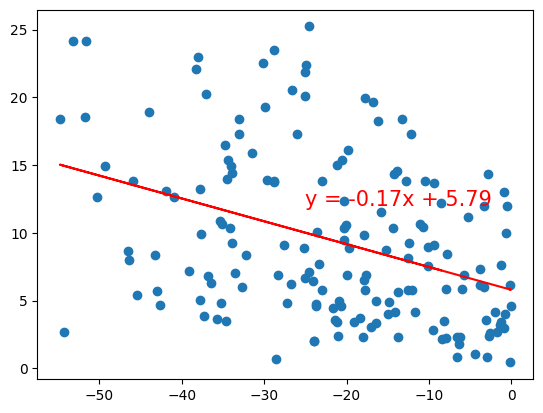

In [51]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed (m/s)', (-25, 12))


**Discussion about the linear relationship:** There seems to be a correlation but it is very week between wind speed and latitude in both the northern and southern hemisphere.